In [6]:
# Arda Mavi
import os
import numpy as np
from os import listdir
import imageio.v2 as imageio
#from scipy.misc import imresize
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2


def get_img(data_path):
    # Getting image array from path:
    img = imageio.imread(data_path, flatten=grayscale_images)
    img = imageio.imresize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img

#dataset https://github.com/rahmanziaur/GradThesisICT18-Colab/tree/main/Datasets

def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    try:
        X = np.load('/content/X.npy')
        Y = np.load('/content/Y.npy')
    except:
        labels = listdir(dataset_path) # Geting labels
        X = []
        Y = []
        for i, label in enumerate(labels):
            datas_path = dataset_path+'/'+label
            for data in listdir(datas_path):
                img = get_img(datas_path+'/'+data)
                X.append(img)
                Y.append(i)
        # Create dateset:
        X = 1-np.array(X).astype('float32')/255.
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X, X_test, Y, Y_test

if __name__ == '__main__':
    get_dataset()

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

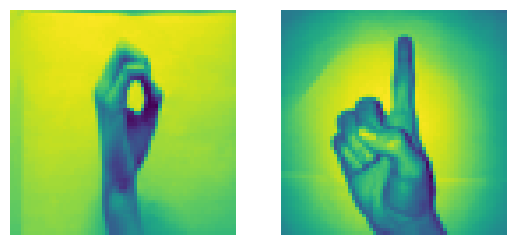

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_l = np.load('/content/X.npy')
Y_l = np.load('/content/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)

for i in x_1:
    plt.imshow(i.reshape(img_size, img_size))
    plt.axis('off')
    plt.subplot(1, 2, 1)

    # plt.subplot(1, 2, 2)
    # plt.imshow([900].reshape(img_size, img_size))
    # plt.axis('off')
# plt.imshow(x_l[261].reshape(img_size, img_size))
# plt.axis('off')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
x_l = np.load('/content/X.npy')
y_l = np.load('/content/Y.npy')
img_size = 64

# Show ALL images in batches of 20 per figure
num_images = len(x_l)
cols = 5
rows = 4  # 20 images per figure

for start in range(0, num_images, rows * cols):
    end = min(start + rows * cols, num_images)
    plt.figure(figsize=(10, 8))

    for i, idx in enumerate(range(start, end)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_l[idx].reshape(img_size, img_size), cmap='gray')
        plt.axis('off')
        plt.title(str(y_l[idx]), fontsize=8)  # show label

    plt.tight_layout()
    plt.show()


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

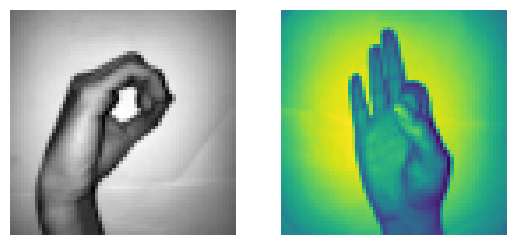

In [17]:
# load data set
x_l = np.load('/content/X.npy')
y_l = np.load('/content/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[5].reshape(img_size, img_size))
plt.axis('off')

In [18]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [21]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(348, 64, 64)
(348, 1)
(62, 64, 64)
(62, 1)


In [22]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


Why Transpose?